<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/From_AODB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antioxidants Data Curation (Data from AODB)

In [26]:
#get functions from functions file (still have to move most of the functions there!)
!wget https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
!wget https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/df_dpph.csv


!pip install rdkit # Order of installment was important now it should work

from func import is_substruct_in, convert_smiles_series_to_fp_to_np_array

#Import packages

import pandas as pd
import re
import numpy as np
import os
from google.colab import drive
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
import matplotlib.pyplot as plt
import math
from sklearn.manifold import TSNE
RDLogger.DisableLog("rdApp.info")

--2025-04-15 18:55:13--  https://github.com/ManuelOtt-code/Project-DC/raw/refs/heads/master/func.py
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py [following]
--2025-04-15 18:55:13--  https://raw.githubusercontent.com/ManuelOtt-code/Project-DC/refs/heads/master/func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4857 (4.7K) [text/plain]
Saving to: ‘func.py.4’

func.py.4           100%[===================>]   4.74K  --.-KB/s    in 0s      

2025-04-15 18:55:13 (49.5 MB/s) - ‘func.py.4’ saved [4857/4857]

--2025-04-15 18:55:13--  https://git

In [8]:
#Get data export from AODB by adding it (locally) or in drive (colab needs to be connected to drive)
drive.mount('/content/drive', force_remount=True)

file_path = "/content/drive/MyDrive/AODB_antio_compounds.csv" #https://drive.google.com/file/d/1oc3pU4BPqn1T-Rta9qZtYNfypGgWt3XH/view?usp=sharing to get acces to csv
df_AODB_all = pd.read_csv(file_path)

#if first converted to xlsx
#file_path = "/content/drive/MyDrive/Colab Notebooks/AODB_antio_compounds.xlsx"
#df_AODB_all = pd.read_excel(file_path)

# Print the first 5 rows of the dataset
df_AODB_all.head()

Mounted at /content/drive


<ipython-input-8-cde25d0f0d50>:5: DtypeWarning: Columns (16,17,18,19,20,21,22,29,31,37,40,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_AODB_all = pd.read_csv(file_path)


,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,Hepatotoxic Prediction,Hepatotoxic Applicability,Hepatotoxic Applicability MD,Hepatotoxic Applicability MDpvalue,Absorption Level,PPB,PPB Prediction,PPB Applicability,PPB Applicability MD,PPB Applicability MDpvalue
0,AOXMO00001,COc1ccc(C2C=C(c3cccc4ccccc34)Nc3nncn32)cc1,InChI=1S/C22H18N4O/c1-27-17-11-9-16(10-12-17)2...,C22H18N4O,354.4,4.50,1,5,52.0,3,...,1.0,All properties and OPS components are within e...,14.1743,2.660000e-06,0.0,-4.580720,0.0,All properties and OPS components are within e...,14.1423,7.582010e-02
1,AOXMO00002,c1coc(-c2cc(-c3cccc4ccccc34)nc3nncn23)c1,InChI=1S/C19H12N4O/c1-2-7-14-13(5-1)6-3-8-15(1...,C19H12N4O,312.3,4.20,0,5,56.2,2,...,1.0,All properties and OPS components are within e...,15.1409,2.280000e-08,0.0,0.024041,1.0,All properties and OPS components are within e...,17.1115,8.360000e-07
2,AOXMO00003,CN(C)c1ccc(-c2cc(-c3cccc4ccccc34)nc3nncn23)cc1,InChI=1S/C23H19N5/c1-27(2)18-12-10-17(11-13-18...,C23H19N5,365.4,4.68,0,5,46.3,3,...,1.0,All properties and OPS components are within e...,13.5232,4.670000e-05,0.0,4.156700,1.0,All properties and OPS components are within e...,16.8879,2.670000e-06
3,AOXMO00004,COc1ccc(-c2cc(-c3cccc4ccccc34)nc3nncn23)cc1OC,InChI=1S/C23H18N4O2/c1-28-21-11-10-16(12-22(21...,C23H18N4O2,382.4,4.63,0,6,61.5,4,...,1.0,All properties and OPS components are within e...,13.0418,3.183260e-04,0.0,4.177740,1.0,All properties and OPS components are within e...,16.3324,3.930000e-05
4,AOXMO00005,c1ccc(-c2cc(-c3cccc4ccccc34)nc3nncn23)cc1,InChI=1S/C21H14N4/c1-2-8-16(9-3-1)20-13-19(23-...,C21H14N4,322.4,4.61,0,4,43.1,2,...,1.0,All properties and OPS components are within e...,13.5630,3.950000e-05,0.0,3.429540,1.0,All properties and OPS components are within e...,15.9088,2.508250e-04


## Filtering

In [10]:
print(len(df_AODB_all))
#print(dataset_initial.columns)

#Filter Data rows for data curation (determined by inspection of data)
df_dpph = df_AODB_all[df_AODB_all["Assay Description"].str.contains("DPPH", case=False, na=False) &
          df_AODB_all["Experimental Data"].str.contains("IC50|EC50", case=False, na=False)
      & ~df_AODB_all["Experimental Data"].str.contains("relative|1/IC50|1/EC50|ratio", case=False, na=False)
      & ~df_AODB_all["Activity Comment"].str.contains("Dose dependent data|Not determined", case=False, na=False)
      & ~df_AODB_all["Target Organism"].str.contains("Rattus norvegicus", case=False, na=False)
      & ~df_AODB_all["Assay Description"].str.contains("liposome|relative|ratio|rat brain", case=False, na=False)
      & (df_AODB_all["Molecular Weight"] <= 1000)  # filter only small MW compounds
]
print(len(df_dpph))
#Reset index
df_dpph.reset_index(drop=True, inplace=True)

98313
5187


## Canonicalize and Standardize SMILES

In [11]:
#standardize and canonicalize smiles and add new column canonical_Smiles
df_dpph["canonical_Smiles"] = df_dpph["SMILES"].apply(rdMolStandardize.StandardizeSmiles)

<ipython-input-11-2af55461c78b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dpph["canonical_Smiles"] = df_dpph["SMILES"].apply(rdMolStandardize.StandardizeSmiles)


## Convert Activity values (problems if run multiple times)

In [12]:
# Function to parse the Experimental Data column
def parse_experimental_data(row):
    # Use regex to extract components
    match = re.match(r'(IC50|EC50)\s*(>=|>|=)\s*([\d.]+)\s*(nM|ug\.mL-1|µg\.mL-1)', row)
    if match:
        return {
            'activity_type': match.group(1),
            'operator': match.group(2),
            'activity_value': float(match.group(3)),
            'units': match.group(4).replace('.', '')  # Remove dots (e.g., ug.mL-1 -> ugmL-1)
        }
    else:
        return None

# Apply parsing and expand into new columns
parsed_data = df_dpph['Experimental Data'].apply(parse_experimental_data).apply(pd.Series)

# Combine with original DataFrame
df_dpph = pd.concat([df_dpph, parsed_data], axis=1)

# Display results
df_dpph.head()

,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,PPB,PPB Prediction,PPB Applicability,PPB Applicability MD,PPB Applicability MDpvalue,canonical_Smiles,activity_type,operator,activity_value,units
0,AOXMO00050,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,InChI=1S/C18H15NO3/c20-9-19-6-5-12-8-15-18(22-...,C18H15NO3,293.3,2.69,0,4,38.8,1,...,3.835750,1.0,All properties and OPS components are within e...,16.9487,0.000002,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,IC50,=,121400.0,nM
1,AOXMO00051,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,InChI=1S/C6H8O6/c7-1-2(8)5-3(9)4(10)6(11)12-5/...,C6H8O6,176.1,-1.41,4,6,107.2,2,...,-13.991000,0.0,All properties and OPS components are within e...,14.3277,0.048874,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,IC50,=,52100.0,nM
2,AOXMO00487,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H17N3O/c1-14-17(19-13-15-9-5-3-6-1...,C18H17N3O,291.4,3.24,0,4,39.3,3,...,-3.209610,0.0,All properties and OPS components are within e...,11.4141,0.980298,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31260.0,nM
3,AOXMO00488,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H16ClN3O/c1-13-17(20-12-14-8-10-15...,C18H16ClN3O,325.8,3.89,0,4,39.3,3,...,0.040773,1.0,All properties and OPS components are within e...,12.4505,0.751763,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31680.0,nM
4,AOXMO00489,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C20H22N4O/c1-15-19(21-14-16-10-12-17(...,C20H22N4O,334.4,3.30,0,5,42.5,4,...,-2.777630,0.0,All properties and OPS components are within e...,14.6459,0.021033,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,2430.0,nM


In [13]:
#convert units of ugmL-1 activity values in nM
def convert_units(row):
    """Proper unit conversion with consistent numeric output"""
    # Check if conversion is needed and possible
    if (row['units'] == 'ugmL-1' and
        'Molecular Weight' in row and
        not pd.isna(row['Molecular Weight']) and
        not pd.isna(row['activity_value'])):

        # Convert µg/mL to nM: (µg/mL * 10^6) / (g/mol) = nM
        return round((float(row['activity_value']) * 10**6) / float(row['Molecular Weight']))

    # Return original value if already in nM or no conversion possible
    elif row['units'] == 'nM' and not pd.isna(row['activity_value']):
        return float(row['activity_value'])

    # Return NaN for unconvertable cases
    return np.nan

# Apply conversion and force float dtype
df_dpph['value_nM'] = df_dpph.apply(convert_units, axis=1).astype(float)

In [14]:
#check if ugmL-1 were properly converted
print(df_dpph[df_dpph['units']=='ugmL-1'])

          AOX ID                                             SMILES  \
18    AOXMO00508                 Cc1n[nH]c(=O)n1/N=C/c1ccc(O)c(O)c1   
19    AOXMO00509         O=c1[nH]nc(Cc2ccccc2)n1/N=C/c1ccc(O)c(O)c1   
20    AOXMO00510     O=c1[nH]nc(Cc2ccc(Cl)cc2)n1/N=C/c1ccc(O)c(O)c1   
21    AOXMO00511     COc1ccc(Cc2n[nH]c(=O)n2/N=C/c2ccc(O)c(O)c2)cc1   
22    AOXMO00512         O=c1[nH]nc(-c2ccccc2)n1/N=C/c1ccc(O)c(O)c1   
...          ...                                                ...   
4849  AOXMO44737  Cc1ccc2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)N...   
4850  AOXMO44738                    O=C1O[C@H]([C@@H](O)CO)C(O)=C1O   
4956  AOXMO46263  CCOC(=O)c1cc2ccc(OCc3cn(Cc4ccc([N+](=O)[O-])cc...   
4957  AOXMO46264                   Cc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1   
5009  AOXMO46434             Cc1ccc(C(=O)CC(=O)c2cc3ccccc3s2)c(O)c1   

                                                  InChI Molecular Formula  \
18    InChI=1S/C10H10N4O3/c1-6-12-13-10(17)14(6)11-5...        C10H10N

In [15]:
#Convert IC50 values in nM into pIC50 values
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

# Apply conversion to each row of the compounds DataFrame
df_dpph["pIC50"] = df_dpph.apply(lambda x: convert_ic50_to_pic50(x.value_nM), axis=1)
df_dpph.head()

,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,Rotatable Bonds,...,PPB Applicability,PPB Applicability MD,PPB Applicability MDpvalue,canonical_Smiles,activity_type,operator,activity_value,units,value_nM,pIC50
0,AOXMO00050,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,InChI=1S/C18H15NO3/c20-9-19-6-5-12-8-15-18(22-...,C18H15NO3,293.3,2.69,0,4,38.8,1,...,All properties and OPS components are within e...,16.9487,0.000002,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,IC50,=,121400.0,nM,121400.0,3.915781
1,AOXMO00051,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,InChI=1S/C6H8O6/c7-1-2(8)5-3(9)4(10)6(11)12-5/...,C6H8O6,176.1,-1.41,4,6,107.2,2,...,All properties and OPS components are within e...,14.3277,0.048874,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,IC50,=,52100.0,nM,52100.0,4.283162
2,AOXMO00487,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H17N3O/c1-14-17(19-13-15-9-5-3-6-1...,C18H17N3O,291.4,3.24,0,4,39.3,3,...,All properties and OPS components are within e...,11.4141,0.980298,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31260.0,nM,31260.0,4.505011
3,AOXMO00488,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H16ClN3O/c1-13-17(20-12-14-8-10-15...,C18H16ClN3O,325.8,3.89,0,4,39.3,3,...,All properties and OPS components are within e...,12.4505,0.751763,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31680.0,nM,31680.0,4.499215
4,AOXMO00489,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C20H22N4O/c1-15-19(21-14-16-10-12-17(...,C20H22N4O,334.4,3.30,0,5,42.5,4,...,All properties and OPS components are within e...,14.6459,0.021033,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,2430.0,nM,2430.0,5.614394


## Visual inspection of data

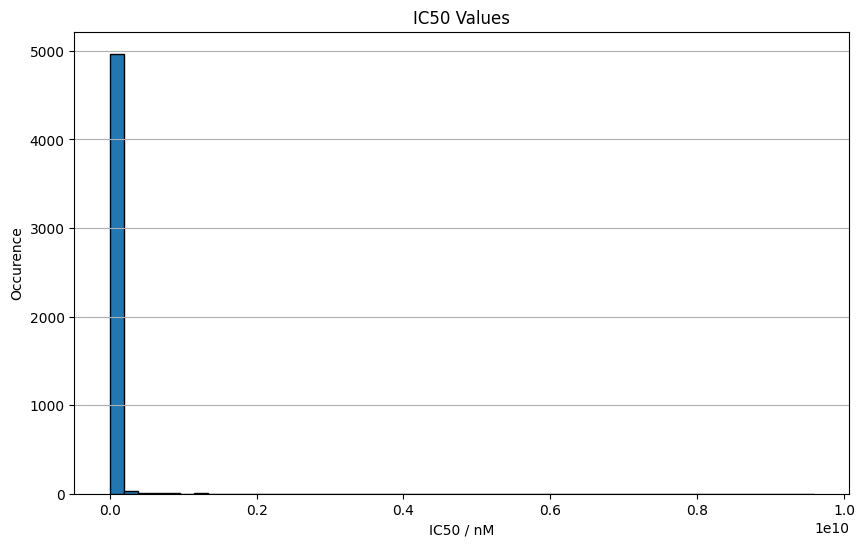

In [16]:
# Histogram of IC50 values in nM
plt.figure(figsize=(10, 6))
plt.hist(df_dpph['value_nM'], bins=50, edgecolor='black')
plt.title('IC50 Values')
plt.xlabel('IC50 / nM')
plt.ylabel('Occurence')
plt.grid(axis='y')

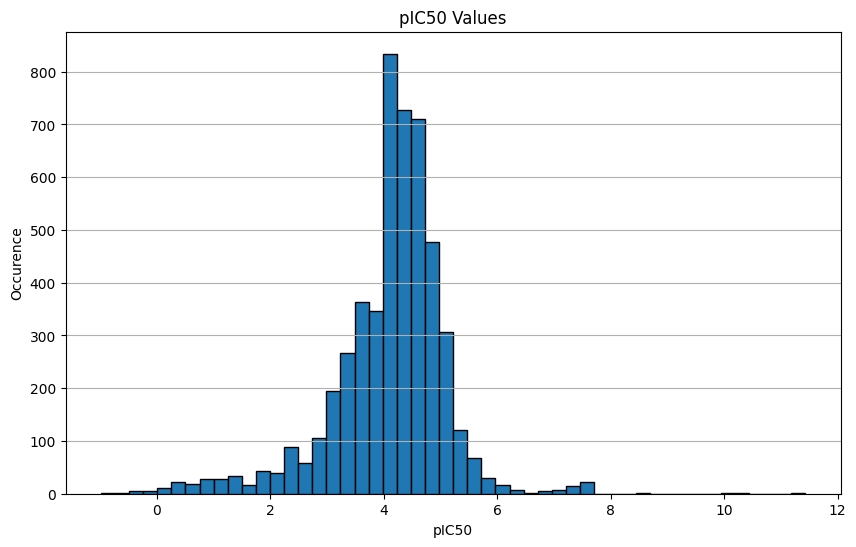

In [17]:
# Histogram of pIC50 values
plt.figure(figsize=(10, 6))
plt.hist(df_dpph['pIC50'], bins=50, edgecolor='black')
plt.title('pIC50 Values')
plt.xlabel('pIC50')
plt.ylabel('Occurence')
plt.grid(axis='y')

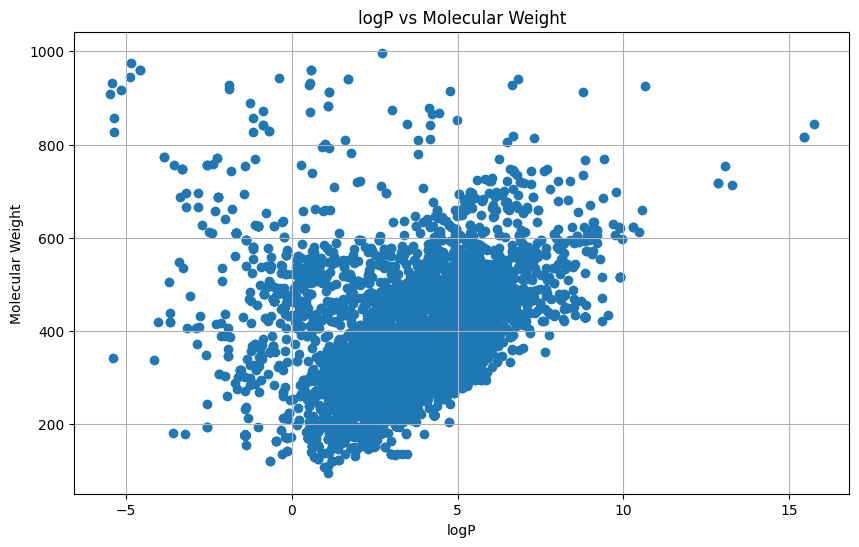

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df_dpph['AlogP'], df_dpph['Molecular Weight'])
plt.title('logP vs Molecular Weight')
plt.xlabel('logP')
plt.ylabel('Molecular Weight')
plt.grid(True)

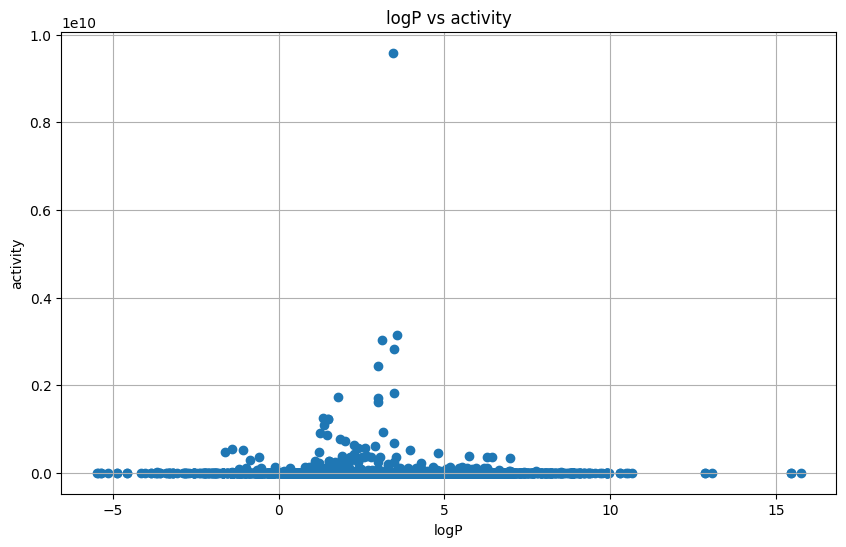

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_dpph['AlogP'], df_dpph['value_nM'])
plt.title('logP vs activity')
plt.xlabel('logP')
plt.ylabel('activity')
plt.grid(True)

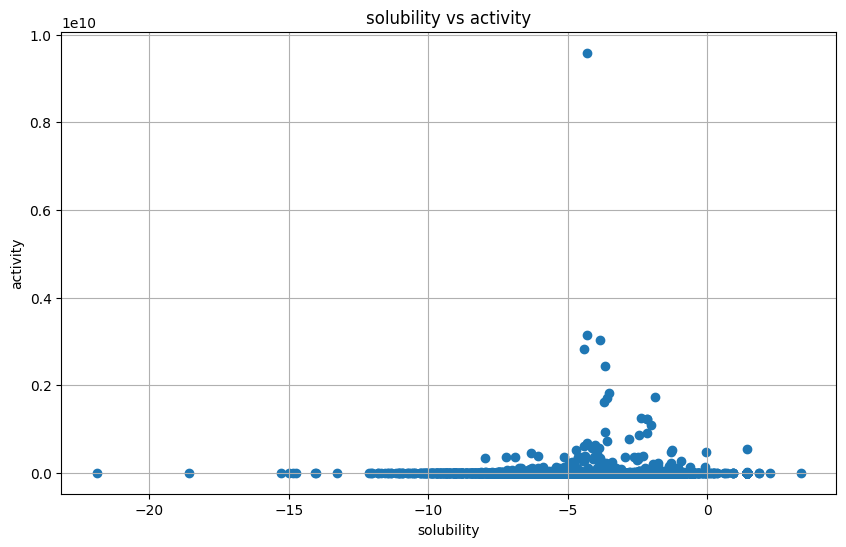

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df_dpph['Solubility'], df_dpph['value_nM'])
plt.title('solubility vs activity')
plt.xlabel('solubility')
plt.ylabel('activity')
plt.grid(True)

## Other Data Inspection

In [21]:
#inspect high activity value compounds
print(df_dpph[df_dpph['value_nM']>1*10**9])

          AOX ID                                    SMILES  \
974   AOXMO09606                       O=C(O)/C=C/c1ccccc1   
995   AOXMO09627               O=c1cc(-c2ccccc2)oc2ccccc12   
1006  AOXMO09638  O=C(/C=C/c1ccc([N+](=O)[O-])cc1)c1ccccc1   
1007  AOXMO09639                O=C(/C=C/c1ccccc1)c1ccccc1   
1887  AOXMO17929            O=C(O)CCCc1nc2ccccc2c(=O)[nH]1   
1888  AOXMO17930                 O=C(O)CCc1nc(O)c2ccccc2n1   
2184  AOXMO19277                       O=c1ccc2ccc(O)cc2o1   
2185  AOXMO19278                       O=c1ccc2cc(O)ccc2o1   
2475  AOXMO22010                         CC1=CCC2CC1C2(C)C   
2476  AOXMO22011                       C=C1CCC2(C(C)C)CC12   
2477  AOXMO22012                         C=C1CCC2CC1C2(C)C   
2479  AOXMO22014                         C=CC(=C)CCC=C(C)C   
2481  AOXMO22016                          Cc1ccc(C(C)C)cc1   

                                                  InChI Molecular Formula  \
974   InChI=1S/C9H8O2/c10-9(11)7-6-8-4-2-1-3-5-8/h1-..

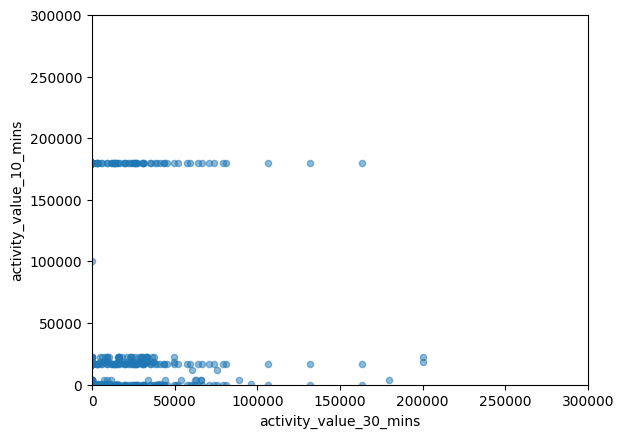

Index(['AOX ID', 'SMILES', 'InChI', 'Molecular Formula', 'Molecular Weight',
       'AlogP', 'HBD', 'HBA', 'Polar Surface Area', 'Rotatable Bonds',
       'QED Weighted', 'Chiral Center', 'Aromatic Rings', 'Heavy Atoms',
       'PubChem CID', 'PubChem AID', 'ChEMBL ID', 'NCBI:txid', 'NCBI Gene ID',
       'Protein Target ID', 'PMID', 'DOI', 'Assay Description', 'Source',
       'Assay Type', 'Activity Comment', 'Target Organism',
       'Protein Target Name', 'Standard Deviation', 'Assay Description ',
       'Average Activation at 10.6 uM, %', 'Kd, uM', 'Inhibition at 50 uM , %',
       'Inhibition at 5 uM , % ', 'Activation at 10.6 uM, %',
       'Relative transcription levels at 1uM, %', 'Percent Response, %',
       'Phenotype', 'Potency', 'Efficacy', 'Phenotype-Replicate_1',
       'Potency-Replicate_1', 'Efficacy-Replicate_1', 'Experimental Data',
       'Target ChEMBL ID', 'Target Pref Name', 'Cell Line Target',
       'Solubility', 'Solubility Level', 'AlogP98', 'PSA 2D', 'BBB'

In [22]:
#not sure but first 3 rows can probably be removed
#parsed_data = df_dpph['Experimental Data'].apply(parse_experimental_data).apply(pd.Series)
#df_dpph = pd.concat([df_dpph, parsed_data], axis=1)
#df_dpph["value_nM"] = df_dpph.apply(convert_units, axis = 1)

#inspect values for 10 min and 30 min assays
df_dpph_10_mins = df_dpph[df_dpph["Assay Description"].str.contains("10 mins", case=False, na=False)]
df_dpph_30_mins = df_dpph[df_dpph["Assay Description"].str.contains("30 mins", case=False, na=False)]



merged_df = pd.merge(df_dpph_30_mins, df_dpph_10_mins, on=["canonical_Smiles"], how="outer", suffixes=('_30_mins', '_10_mins'))

merged_df = merged_df.dropna(subset=["activity_value_30_mins", "activity_value_10_mins"], how="all")
merged_df[["activity_value_30_mins", "activity_value_10_mins"]].dropna().plot(kind="scatter", x="activity_value_30_mins", y="activity_value_10_mins", alpha=0.5)
plt.xlim([0, 300000])
plt.ylim([0, 300000])
plt.xlabel("activity_value_30_mins")
plt.ylabel("activity_value_10_mins")
plt.show()
df_dpph.columns


In [23]:
#check with phenol SMARTS if compounds are phenolic

phenol = "c1ccccc1[OH]"
df_dpph["is_phenol"] = df_dpph["canonical_Smiles"].apply(is_substruct_in, substruct_smarts = phenol)

print(len(df_dpph[df_dpph["is_phenol"] == True]), len(df_dpph))

fp_array = convert_smiles_series_to_fp_to_np_array(df_dpph["canonical_Smiles"])

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(fp_array)

3053 5187


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use MorganGenerator
[18:47:49] DEPRECATION WARNING: please use Morga

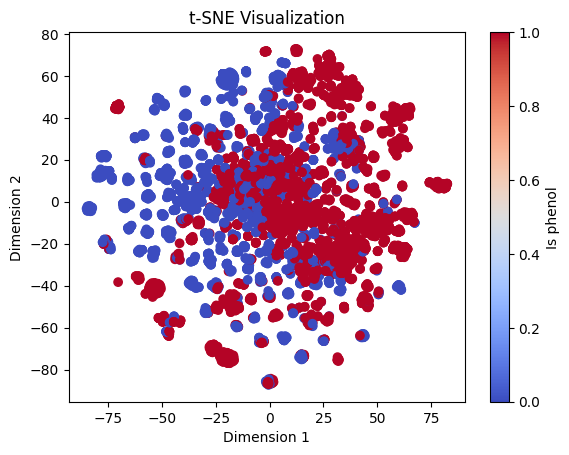

In [24]:
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=df_dpph["is_phenol"], cmap="coolwarm")
cb = plt.colorbar()
cb.set_label("Is phenol")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

plt.title("t-SNE Visualization")
plt.show()

In [ ]:
df_test = df_dpph[["canonical_Smiles", "activity_value"]]
df_dpph["DOI"].value_counts()

,count
DOI,
10.1016/j.bmcl.2012.12.001,91
10.1016/j.bmc.2014.10.015,50
10.1016/j.bmcl.2014.09.028,50
10.1016/j.ejmech.2010.04.013,39
10.1016/j.ejmech.2011.08.010,37
...,...
10.1016/j.bmcl.2012.12.060,1
10.1021/np030513u,1
10.1021/np500233t,1


In [ ]:
df_dpph["Assay Description"].value_counts()

,count
Assay Description,
Antioxidant activity assessed as DPPH radical scavenging activity,507
Antioxidant activity assessed as DPPH radical scavenging activity after 30 mins,308
Antioxidant activity assessed as DPPH free radical scavenging activity after 30 mins,270
Antioxidant activity assessed as DPPH free radical scavenging activity,207
Antioxidant activity assessed as DPPH radical scavenging activity after 30 mins by spectrophotometry,156
...,...
Antioxidant activity assessed as DPPH free radical scavenging after 40 mins incubation in dark,1
Antioxidant activity assessed as DPPH radical scavenging activity incubated for 10 mins under dark condition,1
Antioxidant activity assessed as DPPH free radical scavenging after 20 mins by UV-Vis spectrophotometric analysis,1


In [ ]:
df_dpph["canonical_Smiles"].value_counts()

,count
canonical_Smiles,
O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,168
Cc1c(C)c2c(c(C)c1O)CCC(C)(C(=O)O)O2,78
Cc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1,57
Cc1c(C)c2c(c(C)c1O)CC[C@@](C)(CCC[C@H](C)CCC[C@H](C)CCCC(C)C)O2,40
O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,39
...,...
COc1cc(OC)c(OC)cc1/C=C/C(=O)c1cccc([N+](=O)[O-])c1,1
COc1cc(OC)c(OC)cc1/C=C/C(=O)c1ccc(Cl)cc1,1
COc1ccc(C(=O)/C=C/c2cc(OC)c(OC)cc2OC)cc1,1


## Save dataframe as csv to Github

In [27]:
#already on github now
pd.read_csv("df_dpph.csv")

,Unnamed: 0,AOX ID,SMILES,InChI,Molecular Formula,Molecular Weight,AlogP,HBD,HBA,Polar Surface Area,...,PPB Applicability MD,PPB Applicability MDpvalue,canonical_Smiles,activity_type,operator,activity_value,units,value_nM,pIC50,is_phenol
0,0,AOXMO00050,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,InChI=1S/C18H15NO3/c20-9-19-6-5-12-8-15-18(22-...,C18H15NO3,293.3,2.69,0,4,38.8,...,16.9487,0.000002,O=CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3,IC50,=,121400.0,nM,121400.0,3.915781,0
1,1,AOXMO00051,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,InChI=1S/C6H8O6/c7-1-2(8)5-3(9)4(10)6(11)12-5/...,C6H8O6,176.1,-1.41,4,6,107.2,...,14.3277,0.048874,O=C1O[C@H]([C@@H](O)CO)C(O)=C1O,IC50,=,52100.0,nM,52100.0,4.283162,0
2,2,AOXMO00487,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H17N3O/c1-14-17(19-13-15-9-5-3-6-1...,C18H17N3O,291.4,3.24,0,4,39.3,...,11.4141,0.980298,Cc1c(/N=C/c2ccccc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31260.0,nM,31260.0,4.505011,0
3,3,AOXMO00488,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C18H16ClN3O/c1-13-17(20-12-14-8-10-15...,C18H16ClN3O,325.8,3.89,0,4,39.3,...,12.4505,0.751763,Cc1c(/N=C/c2ccc(Cl)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,31680.0,nM,31680.0,4.499215,0
4,4,AOXMO00489,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,InChI=1S/C20H22N4O/c1-15-19(21-14-16-10-12-17(...,C20H22N4O,334.4,3.30,0,5,42.5,...,14.6459,0.021033,Cc1c(/N=C/c2ccc(N(C)C)cc2)c(=O)n(-c2ccccc2)n1C,IC50,=,2430.0,nM,2430.0,5.614394,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5182,5182,AOXMO47445,O=C(OCCc1ccc(O)cc1)c1cc(O)c(O)c(O)c1,InChI=1S/C15H14O6/c16-11-3-1-9(2-4-11)5-6-21-1...,C15H14O6,290.3,1.91,4,6,107.2,...,11.8268,0.933475,O=C(OCCc1ccc(O)cc1)c1cc(O)c(O)c(O)c1,IC50,=,7520.0,nM,7520.0,5.123782,1
5183,5183,AOXMO47446,O=C(OCCc1ccccc1O)c1cc(O)c(O)c(O)c1,InChI=1S/C15H14O6/c16-11-4-2-1-3-9(11)5-6-21-1...,C15H14O6,290.3,1.91,4,6,107.2,...,12.0444,0.887349,O=C(OCCc1ccccc1O)c1cc(O)c(O)c(O)c1,IC50,=,8310.0,nM,8310.0,5.080399,1
5184,5184,AOXMO47447,O=C(OCCc1cccc(O)c1)c1cc(O)c(O)c(O)c1,InChI=1S/C15H14O6/c16-11-3-1-2-9(6-11)4-5-21-1...,C15H14O6,290.3,1.91,4,6,107.2,...,13.0616,0.459216,O=C(OCCc1cccc(O)c1)c1cc(O)c(O)c(O)c1,IC50,=,7780.0,nM,7780.0,5.109020,1
5185,5185,AOXMO47448,Cc1c(C)c2c(c(C)c1O)CC[C@@](C)(CCC[C@H](C)CCC[C...,InChI=1S/C29H50O2/c1-20(2)12-9-13-21(3)14-10-1...,C29H50O2,430.7,8.84,1,2,29.5,...,17.0697,0.000001,Cc1c(C)c2c(c(C)c1O)CC[C@@](C)(CCC[C@H](C)CCC[C...,IC50,=,9890.0,nM,9890.0,5.004804,1


## Landrum et al. inspired data curation (10.1021/acs.jcim.4c00049)



In [ ]:
df_model_1 = df_dpph["canonical_Smiles"].value_counts().reset_index()
repeated_smiles = df_model_1[df_model_1["count"] > 1]["canonical_Smiles"]
df_model_1 = df_dpph[df_dpph["canonical_Smiles"].isin(repeated_smiles)]

df_model_1_grouped = df_model_1.groupby(["canonical_Smiles"])["value_nM"].mean()
df_model_1_grouped.head()


,value_nM
canonical_Smiles,
C/C=C/c1ccc2oc(-c3ccc(O)cc3O)cc2c1,22100.000000
C/C=C/c1ccc2oc(-c3ccc(O)cc3OC)cc2c1,36300.000000
C/C=C/c1ccc2oc(-c3ccc(OC)cc3O)cc2c1,24200.000000
CC(=O)N[C@@H](CS)C(=O)O,46966.666667
CC(C)(C)c1cc(O)ccc1O,47626.000000


In [33]:
#this may work? dont know just generated by chatgpt and didnt fully check if made sense
def extract_connected_assays(df):
    """
    Extracts rows from the input dataframe (df_dpph) that have operator '='
    and belong to canonical_Smiles groups for which the compound was measured
    in at least two different assays (Assay Description) with pIC50 values that
    are in close agreement (absolute difference less than 0.3).

    Parameters:
      df (pd.DataFrame): Input dataframe with the following columns:
                         'operator', 'canonical_Smiles', 'pIC50',
                         'Assay Description', and 'DOI'.

    Returns:
      pd.DataFrame: A filtered dataframe containing only those rows from
                    assays that are connected via compatible pIC50 measurements.
    """
    # Work only on the rows where the operator is "=".
    df_eq = df[df['operator'] == '='].copy()

    # Use a set to gather indices of rows meeting the connection criterion.
    connected_indices = set()

    # Group the data by canonical_Smiles.
    for smile, group in df_eq.groupby('canonical_Smiles'):

        # Only consider groups measured in at least two different assay descriptions.
        assay_descs = group['Assay Description'].unique()
        if len(assay_descs) < 2:
            continue

        # Flag to check if at least one pair of rows (from different assays) meets the criterion.
        found_connection = False
        group_indices = group.index.tolist()

        # Compare every unique pair from the group.
        for i in range(len(group_indices)):
            for j in range(i + 1, len(group_indices)):
                row_i = group.loc[group_indices[i]]
                row_j = group.loc[group_indices[j]]

                # Only consider pairs coming from different assay descriptions.
                if row_i['Assay Description'] != row_j['Assay Description']:
                    diff = abs(row_i['pIC50'] - row_j['pIC50'])
                    if diff < 0.3:
                        found_connection = True
                        break
            if found_connection:
                break

        # If a connection is found for this canonical smile, mark all rows in the group.
        if found_connection:
            connected_indices.update(group_indices)

    # Return the subset of rows that are connected.
    return df_eq.loc[sorted(connected_indices)].reset_index(drop=True)

# Example usage:
# Assuming df_dpph is your dataframe loaded from Excel.
connected_df = extract_connected_assays(df_dpph)

# Now, connected_df contains all rows from assays that are connected
# via a canonical smile measured in at least two different assays with |ΔpIC50| < 0.3.
# For example, you can print the connected dataframe or export it:
print(connected_df)
print(len(connected_df))
# Now, report the number of unique canonical smiles and assay descriptions in the final dataframe.
num_smiles = connected_df['canonical_Smiles'].nunique()
num_assays = connected_df['Assay Description'].nunique()
print(f"Final curated DataFrame has {num_smiles} unique canonical_Smiles and {num_assays} unique assay descriptions.")

Brc1ccc(-c2csc(N/N=C/c3cc4ccccc4s3)n2)cc1
Brc1ccc(-c2nnn3c2C2c4ccccc4CCN2Cc2ccccc2-3)cc1
Brc1ccc(Cn2cc(COc3ccccc3)nn2)cc1
Brc1ccc2c(c1)Cc1c-2[nH]c2ccccc12
C(=N/Nc1nc(-c2ccccc2)cs1)\c1cccs1
C(=N/Nc1nc(C23CC4CC(CC(C4)C2)C3)cs1)\c1cc2ccccc2s1
C(=N\Nc1nc(-c2cc3ccccc3o2)cs1)\c1cn(-c2ccccc2)nc1-c1cccs1
C(=N\Nc1nc2nc3ccccc3nc2s1)\c1cn(-c2ccccc2)nc1-c1cccs1
C/C(=C/Cc1c([C@@H]2CC(=O)c3c(O)cc(O)cc3O2)ccc(O)c1O)CCCC(C)(C)O
C/C(=C/O[C@@H]1O[C@H](COC(=O)c2cc(O)c(O)c(O)c2)[C@@H](O)[C@H](O)[C@H]1O)C(=O)O
C/C(=C\Cc1cc([C@@H]2CC(=O)c3c(O)cc(O)cc3O2)cc(O)c1O)CCCC(C)(C)O
C/C(=C\c1c(C)c(O)cc2c1[nH]c1c(O)ccc(C=O)c12)CCC(C)C
C/C(=C\c1c(C)c(O)cc2c1[nH]c1c(O)ccc(CO)c12)CCC(C)C
C/C(=N/NC(=O)c1cc2ccc(O)cc2oc1=N)c1nc(-c2ccccc2)[nH]c1C
C/C(=N/Nc1nc(-c2cccc([N+](=O)[O-])c2)cs1)C1CC1
C/C(=N/Nc1nc(-c2cccc([N+](=O)[O-])c2)cs1)C1CCCCC1
C/C(=N\CC1(CC(=O)O)CCCCC1)c1c[nH]c2ccccc12
C/C(=N\CC1(CC(=O)O)CCCCC1)c1ccccn1
C/C(=N\CC1(CC(=O)O)CCCCC1)c1cccnc1
C/C(=N\N=C1\N=C(c2cc3ccccc3o2)CS1)c1nc(-c2ccccc2)[nH]c1C
C/C(=N\N=C1\N=C

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
2955         =        570000.0    nM  570000.0  3.244125         0  

[1 rows x 77 columns]

Group for O=C(/C=C/c1ccc2c(c1)OCO2)c1cc2ccc(O)cc2oc1=O:
          AOX ID                                        SMILES  \
2958  AOXMO25466  O=C(/C=C/c1ccc2c(c1)OCO2)c1cc2ccc(O)cc2oc1=O   

                                                  InChI Molecular Formula  \
2958  InChI=1S/C19H12O6/c20-13-4-3-12-8-14(19(22)25-...          C19H12O6   

      Molecular Weight  AlogP  HBD  HBA  Polar Surface Area  Rotatable Bonds  \
2958             336.3   3.12    1    6                86.0                3   

      ...  PPB Applicability MD  PPB Applicability MDpvalue  \
2958  ...               16.7353                    0.000006   

                                  canonical_Smiles  activity_type  operator  \
2958  O=C(/C=C/c1ccc2c(c1)OCO2)c1cc2ccc(O)cc2oc1=O           IC50         =   

      activity_value units  value_nM     pIC50 is

KeyboardInterrupt: 

## 30 min assay duration data curation

## Minimal data curation